In [3]:
import numpy as np
from matplotlib import pyplot as plt

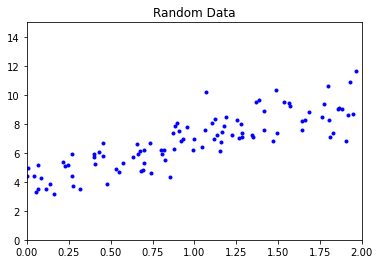

In [4]:
###4.1.1 정규방정식###
#https://mazdah.tistory.com/831
X = 2 * np.random.rand(100, 1) #0~1 사이의 균일분포 표준정규분포 난수 (100,1)행렬 생성
Y = 4 + 3 * X + np.random.randn(100, 1) #평균 0 표준편차 1인 가우시안 표준정규분포 난수 (100,1)행렬 생성

plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])
plt.title("Random Data")
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X] #모든 샘플에 x0 = 1을 추가, 입력특성 x0은 항상1이니까
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y) #정규방정식 공식적용, inv는 역행렬을 구해줌
theta_best

array([[4.05105486],
       [2.79649357]])

In [6]:
X_new = np.array([[0], [2]]) #예측할 데이터
X_new_b = np.c_[np.ones((2, 1)), X_new] #입력특성 x0은 항상 1
Y_predict = X_new_b.dot(theta_best) #정규방적식을 사용해 예측
Y_predict #예측값 출력

array([[4.05105486],
       [9.644042  ]])

In [8]:
##같은 작업을 하는 사이킷런 코드##
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict([[0], [2]])

array([[4.05105486],
       [9.644042  ]])

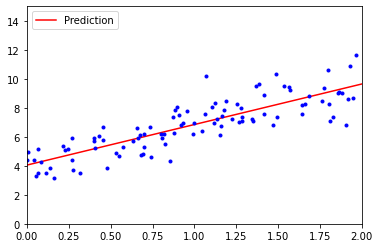

In [9]:
#정규방정식을 그래프에 표현
plt.plot(X_new, Y_predict, "r-", label="Prediction")
plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left")
plt.show()

In [10]:
###4.2 경사하강법###
eta = 0.1 #학습률
n_iterations = 1000 #학습반복 횟수
m = 100

theta = np.random.randn(2, 1) #평균 0, 표준편차 1인 가우시안 정규분포 난수 (2,1)행렬 생성

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y) #비용함수의 편도함수(비용함수 미분한 것)
    theta = theta - eta * gradients #가중치 업데이트

theta

array([[4.05105486],
       [2.79649357]])

15


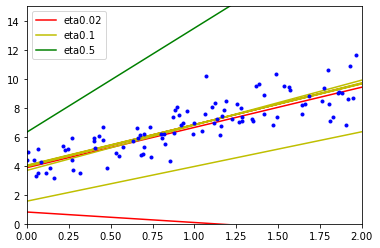

In [11]:
#학습률 차이의 결과
etas = [0.02, 0.1, 0.5] #학습률
formula = []

for lr in etas:
    theta = np.random.randn(2, 1) #평균 0, 표준편차 1인 가우시안 정규분포 난수 (2,1)행렬 생성
    for iteration in range(200):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y) #비용함수의 편도함수(비용함수 미분한 것)
        theta = theta - lr * gradients #가중치 업데이트
        if iteration % 40 == 0:
            formula.append(theta)
            
print(len(formula))

#최적해에 아직 도달못함
plt.plot([0, 2], [formula[0][1] * x + formula[0][0] for x in [0, 2]], "r-", label="eta0.02")
plt.plot([0, 2], [formula[1][1] * x + formula[1][0] for x in [0, 2]], "r-")
plt.plot([0, 2], [formula[2][1] * x + formula[2][0] for x in [0, 2]], "r-")
plt.plot([0, 2], [formula[3][1] * x + formula[3][0] for x in [0, 2]], "r-")
plt.plot([0, 2], [formula[4][1] * x + formula[4][0] for x in [0, 2]], "r-")

#최적해에 도달
plt.plot([0, 2], [formula[5][1] * x + formula[5][0] for x in [0, 2]], "y-", label="eta0.1")
plt.plot([0, 2], [formula[6][1] * x + formula[6][0] for x in [0, 2]], "y-")
plt.plot([0, 2], [formula[7][1] * x + formula[7][0] for x in [0, 2]], "y-")
plt.plot([0, 2], [formula[8][1] * x + formula[8][0] for x in [0, 2]], "y-")
plt.plot([0, 2], [formula[9][1] * x + formula[9][0] for x in [0, 2]], "y-")

#최적해를 건너뜀
plt.plot([0, 2], [formula[10][1] * x + formula[10][0] for x in [0, 2]], "g-", label="eta0.5")
plt.plot([0, 2], [formula[11][1] * x + formula[11][0] for x in [0, 2]], "g-")
plt.plot([0, 2], [formula[12][1] * x + formula[12][0] for x in [0, 2]], "g-")
plt.plot([0, 2], [formula[13][1] * x + formula[13][0] for x in [0, 2]], "g-")
plt.plot([0, 2], [formula[14][1] * x + formula[14][0] for x in [0, 2]], "g-")

plt.plot(X, Y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left")
plt.show()

In [12]:
###4.2.2 확률적 경사 하강법###
n_epochs = 50 #몇개의 훈련세트를 반복학습 할 건지
t0, t1 = 5, 50 #학습스케줄 하이퍼파라미터

def learning_schedule(t): #무작위성으로 인해 전역최소값을 지나치는 경우 방지
    return t0 / (t + t1) #시간이 지날수록 학습률 감소시킴, 어닐링(annealing)

theta = np.random.randn(2, 1) #가중치

for epoch in range(n_epochs):
    for i in range(m): #m개의 샘플 추출
        random_index = np.random.randint(m) #무작위로 추출할 샘플의 인덱스
        xi = X_b[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.13360247],
       [2.75541954]])

In [13]:
##사이킷런의 SGD클래스 사용##
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1) #학습스케줄에 의해 학습률이 자동으로 줄어듬
sgd_reg.fit(X, Y.ravel()) #ravel함수는 다차원배열을 1차원으로 변환함
sgd_reg.intercept_, sgd_reg.coef_

(array([4.01946604]), array([2.74065903]))

In [14]:
### 4.3다항회귀 ###
m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) #노이즈가 섞인 2차 방정식형태의 데이터생성

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) #2차방정식, 편향을 위한 특성(x0 = 1)추가 안함
X_poly = poly_features.fit_transform(X) #훈련세트에 있는 특성을 제곱해서 새로운 특성으로 추가
print(X[0])
print(X_poly[0]) #원래특성, 제곱한특성

[-0.81209819]
[-0.81209819  0.65950348]


In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y, None)
lin_reg.intercept_, lin_reg.coef_

(array([1.90593705]), array([[1.10370397, 0.50470256]]))

In [17]:
#PolynomialFeatures에서 interaction_only=False로 지정하면 거듭제곱이 포함된 항은 제외됨
poly_features.get_feature_names() #만들어진 특성의 차수 확인

C:\Users\Sun\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\data.py:1263: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for c in combinations)


['x0', 'x0^2']

In [18]:
###4.4학습곡선###
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, X, Y):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], Y_train[:m])
        Y_train_predict = model.predict(X_train[:m])
        Y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(Y_train[:m], Y_train_predict))
        val_errors.append(mean_squared_error(Y_val, Y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training Set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Set")
    plt.ylim([0,3])
    plt.legend()
    plt.show()

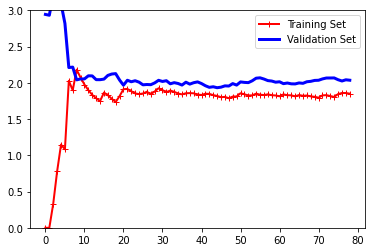

In [19]:
lin_reg = LinearRegression() #비선형데이터를 선형모델에 맞춤, 과소적합
plot_learning_curves(lin_reg, X, Y)

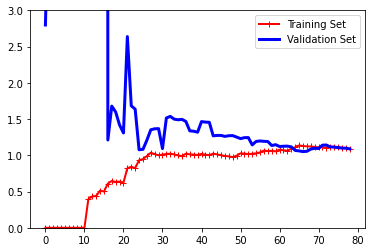

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("Poly_features", PolynomialFeatures(degree=10, include_bias=False)), #10차항 다항회귀 모델, 과대적합
    ("lin_reg", LinearRegression())
]) #훈련데이터의 오차가 선형회구모델보다 낮다, 훈련데이터성능이 검증데이터 성능보다 좋음(과대적합)
#훈련세트 더 많이 넣으면 훈련데이터와 검증데이터 간의 오차가 점점 줄어듬

plot_learning_curves(polynomial_regression, X, Y)

In [24]:
###4.5.1릿지회귀###
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky") #숄레스키 분해 사용, 규제정도 1
#alpha가 0이면 선형회귀와 같아짐, alpha가 너무 크면 모든 가중치가 0에 가까워져서 데이터 평균을 지나는 수직선이 됨
ridge_reg.fit(X, Y)
ridge_reg.predict([[1.5]])

array([[5.44785983]])

In [25]:
sgd_reg = SGDRegressor(max_iter=50, penalty="l2") #l2노름으로 파라메터 규제, Ridge에서 solver="sag"와 동일
sgd_reg.fit(X, Y.ravel())
sgd_reg.predict([[1.5]])

array([5.44994258])

In [26]:
###4.5.2라쏘회귀###
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, Y)
lasso_reg.predict([[1.5]])

array([5.41385343])

In [27]:
###4.5.3엘라스틱넷###
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) #l1_ratio가 1이면 라쏘회귀와 같고 0이면 릿지회귀와 같음
elastic_net.fit(X, Y)
elastic_net.predict([[1.5]])

array([5.41156292])

In [36]:
###4.5.4얼리스테핑###
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                      learning_rate="constant", eta0=0.0005)

#warm_start=True로 지정하면 fit메소드가 호출될 때 이전 모델 파라미터에서 계속 훈련
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, Y_train.ravel()) #훈련을 이어서 진행
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(Y_val, y_val_predict) #각 스텝별 오차 저장
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg) #최적의 모델저장

C:\Users\Sun\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [42]:
###4.6.3 로지스틱회귀 - 결정경계###
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:, 3:] #꽃잎의 너비
Y = (iris["target"] == 2).astype(np.int) #Iris-Virginica만 체크

['data', 'target', 'target_names', 'DESCR', 'feature_names']


In [43]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

A:\ProgramData\Anaconda3\envs\handsonml\lib\site-packages\matplotlib\patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


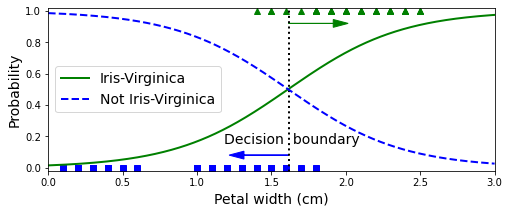

In [60]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
Y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] #두 곡선이 만나는 1.5가 결정경계

plt.figure(figsize=(8, 3))
plt.plot(X[Y==0], Y[Y==0], "bs")
plt.plot(X[Y==1], Y[Y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()
##세모(1.4 ~ 2.5분포)는 Iris-Virginica의 꽃잎너비
##네모(0.1 ~ 1.8분포)는 다른붖꽃의 꽃잎너비

In [61]:
log_reg.predict([[1.7], [1.5]]) #결정경계인 1.6을 기준으로 분류결과가 나뉨

array([1, 0])

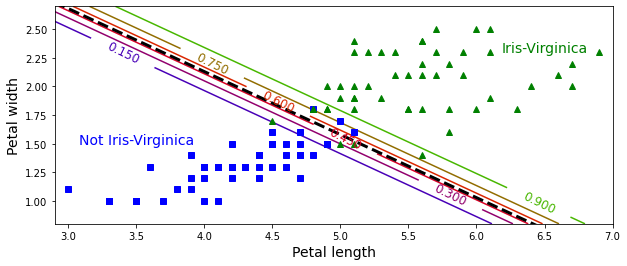

In [68]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4)) #창크기 조정
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

In [65]:
###4.6.4소프트맥스(다항 로지스틱)회귀###
X = iris["data"][:, (2,3)] #꽃잎길이, 꽃잎너비
Y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
#multi_class를 multinomial로 바꾸면 소프트맥스 회귀 사용가능, solver에 소프트맥스 회귀를 지원하는 알고리즘(lbfgs) 지정
softmax_reg.fit(X, Y)

softmax_reg.predict([[5, 2]])

array([2])

In [66]:
softmax_reg.predict_proba([[5, 2]]) #94%의 확률로 2번클래스라고 확신

array([[6.33134078e-07, 5.75276066e-02, 9.42471760e-01]])